### Preliminaries
Loading data, defining lines 

In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as pl
import visualize as vis
import danframe as dan
import kontin as con
import lines as lin
import numpy as np
import astropy.io.fits as fts

pl.rcParams["figure.figsize"] = (10,6) # Bigger figures
s6405_t5p = dan.frameseries("data/6405_aS1","top 5%")


# Load continuum contrast 
cont, =  fts.open("data/6405_aS1__concont.fits")

# Group cont with order value, sort by cont in decreasing order, then save only the top twelve frames
qual = [(x,i) for i,x in enumerate(cont.data)] ; qual.sort(key=lambda x: x[0],reverse=True)
s6405_t5p.frames = [s6405_t5p.frames[x[1]] for x in qual[:12]]
s6405_t5p.normalize()

block = s6405_t5p.frames[0].data

for frm in s6405_t5p.frames[1:]:
    block = np.vstack((block,frm.data))

CN, FeI, SiFe, myst, CNq = lin.make_lines_from_wins(s6405_t5p,s6405_t5p.pkwindows)

#Helpful constants
vel = 0; bot = 1; con = 2; err = 3; ew  = 4; mn  = 5; var = 6; ske = 7; kur = 8
mesFeI   = FeI.measure(s6405_t5p)
mesSiFe  = SiFe.measure(s6405_t5p)
mesmyst  = myst.measure(s6405_t5p)
mesCN    = CN.measure(s6405_t5p)
mesCNq   = CNq.measure(s6405_t5p)


/opt/miniconda/envs/master/lib/python3.5/site-packages/astropy/stats/bayesian_blocks.py:421: UserWarning: p0 does not seem to accurately represent the false positive rate for event data. It is highly recommended that you run random trials on signal-free noise to calibrate ncp_prior to achieve a desired false positive rate.
  warnings.warn('p0 does not seem to accurately represent the false '


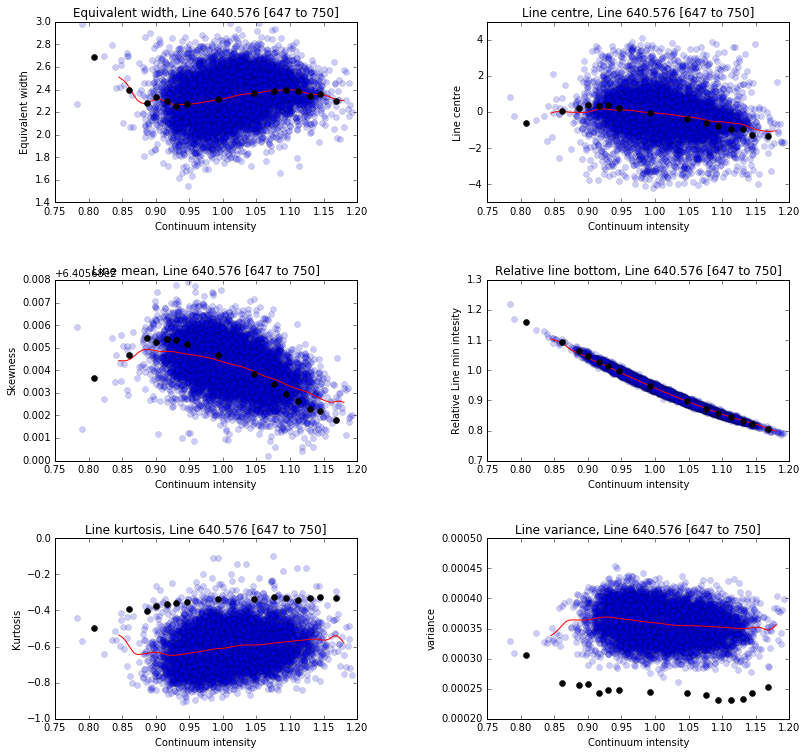

In [9]:
lmb  = s6405_t5p.lmbd[myst.idx]
quant = mesmyst[con].reshape(-1)
cuts  = mesmyst[err] < np.percentile(mesmyst[err],95)
binned = lin.binned_framegroup(myst,s6405_t5p,quant,cuts)
mesBinnMyst = binned.measure()

pl.rcParams["figure.figsize"] = (12,11)
vis.plot_linemap(mesmyst,myst,binned=(mesBinnMyst,binned.cont.reshape(-1)))

/opt/miniconda/envs/master/lib/python3.5/site-packages/astropy/stats/bayesian_blocks.py:421: UserWarning: p0 does not seem to accurately represent the false positive rate for event data. It is highly recommended that you run random trials on signal-free noise to calibrate ncp_prior to achieve a desired false positive rate.
  warnings.warn('p0 does not seem to accurately represent the false '


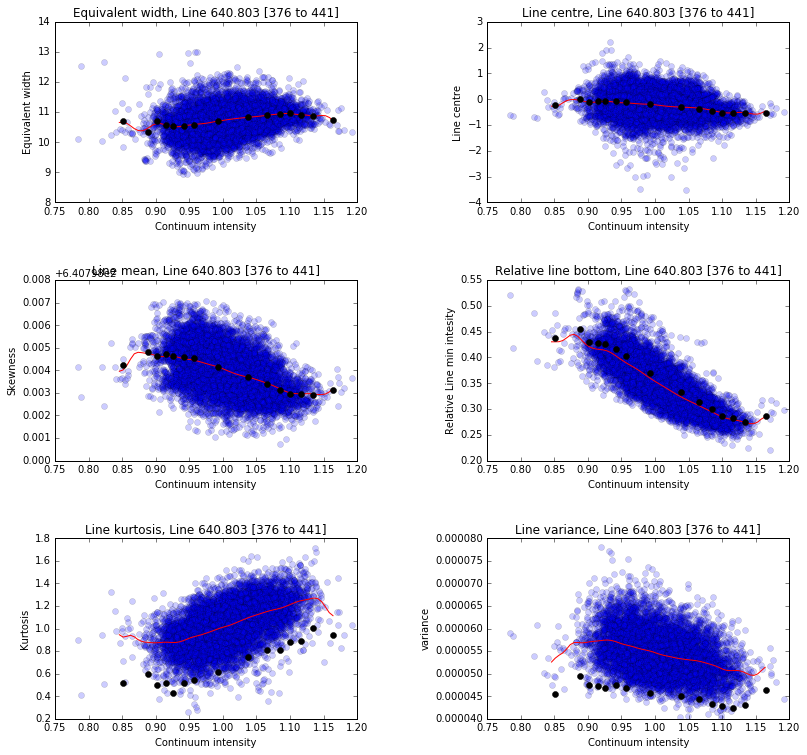

In [11]:
quant = mesFeI[con].reshape(-1)
cuts  = mesFeI[err] < np.percentile(mesFeI[err],89)
binFeI = lin.binned_framegroup(FeI,s6405_t5p,quant,cuts)
mesBinnFeI = binFeI.measure()

pl.rcParams["figure.figsize"] = (12,11)
vis.plot_linemap(mesFeI,FeI,binned=(mesBinnFeI,binFeI.cont.reshape(-1)))

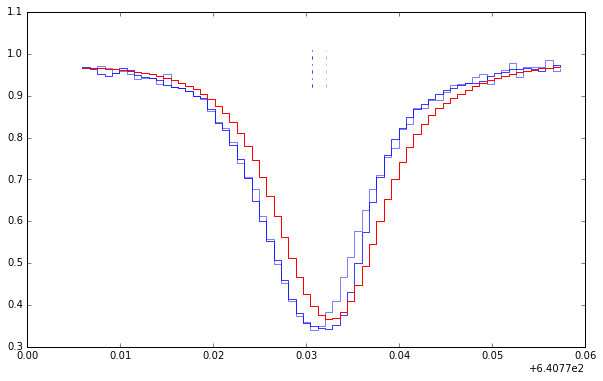

Binned: mn 640.8017, var 0.00004, skew -0.0433, kur 0.7499
Local:  mn 640.8006, var 0.00006, skew 0.1227, kur 1.0376
Local:  mn 640.7996, var 0.00005, skew 0.2987, kur 1.3189
Local:  mn 640.8006, var 0.00005, skew 0.0066, kur 1.0859
Local:  mn 640.8022, var 0.00005, skew 0.0136, kur 1.3390


In [19]:
sort = np.digitize(mesFeI[con][cuts],binFeI.bins[:-1])
pl.rcParams["figure.figsize"] = (10,6) # Bigger figures
i  = 8 
nrand = 12
lmb  = s6405_t5p.lmbd[FeI.idx]

idx,  = np.where((sort == i))
idx   = np.random.choice(idx,nrand)
dat = [block[idx[i],FeI.idx] for i in range(0,nrand)]
       
meslo = moments(lmb,dat)


pl.step(lmb,block[idx[0],FeI.idx],'b',alpha=0.5)
pl.plot(mesFeI[mn][0,idx[0]]*np.ones(2),[0.92,1.02],'-.b',alpha=0.4)
pl.step(lmb,block[idx[2],FeI.idx],'b',alpha=0.5)
pl.plot(mesFeI[mn][0,idx[2]]*np.ones(2),[0.92,1.02],'-.b',alpha=0.4)
pl.step(lmb,block[idx[2],FeI.idx],'b',alpha=0.5)
pl.plot(mesFeI[mn][0,idx[2]]*np.ones(2),[0.92,1.02],'-.b',alpha=0.4)



pl.step(lmb,binFeI.data[i-1],'r')
pl.plot(mesBinnFeI[mn-1][i-1]*np.ones(2),[0.92,1.02],'-.r',alpha=0.4)
pl.show()

print("Binned: mn {:.4f}, var {:.5f}, skew {:.4f}, kur {:.4f}".format(mesBinnFeI[mn-1][i],
                                                      mesBinnFeI[var-1][i],
                                                      mesBinnFeI[ske-1][i],
                                                      mesBinnFeI[kur-1][i]))
print("Local:  mn {:.4f}, var {:.5f}, skew {:.4f}, kur {:.4f}".format(meslo[0][0],
                                                      meslo[1][0],
                                                      meslo[2][0],
                                                      meslo[3][0]))
print("Local:  mn {:.4f}, var {:.5f}, skew {:.4f}, kur {:.4f}".format(meslo[0][1],
                                                      meslo[1][1],
                                                      meslo[2][1],
                                                      meslo[3][1]))
print("Local:  mn {:.4f}, var {:.5f}, skew {:.4f}, kur {:.4f}".format(meslo[0][2],
                                                      meslo[1][2],
                                                      meslo[2][2],
                                                      meslo[3][2]))
print("Local:  mn {:.4f}, var {:.5f}, skew {:.4f}, kur {:.4f}".format(meslo[0][3],
                                                      meslo[1][3],
                                                      meslo[2][3],
                                                      meslo[3][3]))


In [188]:
type(dat[0])

numpy.ndarray

Mean seems to be a bit higher for the binned than for the random curves, and this appears a somewhat plausible description of how things are from small random sampling of the binned vs the raw spectra.

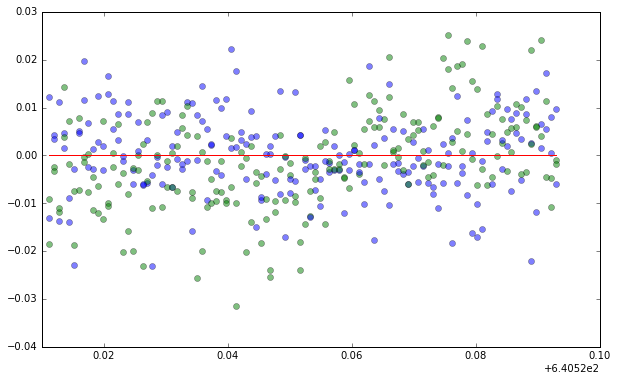

In [136]:
pl.plot(lmb,block[idx[0],myst.idx]-binned.data[i-1],'ob',alpha=0.5)
pl.plot(lmb,block[idx[1],myst.idx]-binned.data[i-1],'og',alpha=0.5)
pl.plot(lmb,block[idx[2],myst.idx]-binned.data[i-1],'ob',alpha=0.5)
pl.plot(lmb,block[idx[3],myst.idx]-binned.data[i-1],'og',alpha=0.5)
pl.plot(lmb[[0,-1]],[0,0],'r')

In [13]:
def moments(x,lines):
    rows = len(lines)    
    mu, mu2, mu3, mu4 = np.zeros(rows),np.zeros(rows),np.zeros(rows),np.zeros(rows)
    for i in range(0,rows):
        line = lines[i]
        dpdf = (1-line/line.max())
        dpdf = dpdf/dpdf.sum()
        mu[i] = np.sum(dpdf*x) # Reshaping enables broadcasting
        mu2[i]= np.sum(dpdf*(x-mu[i])**2)
        mu3[i]= np.sum(dpdf*(x-mu[i])**3)
        mu4[i]= np.sum(dpdf*(x-mu[i])**4)

    skew = mu3/mu2**(3/2) 
    kurt = (mu4/mu2**2 - 3)
    return mu,mu2,skew,kurt